# Imports

In [ ]:
# !pip install scikit-learn

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Exercise 1: PCA plots
Apply PCA on a dataset of your choice and plot the following:

- scree plot (eigenvalues)

- eigenvectors (loadings)

- seaborn PairGrid, first 5 PCs

- 3d plot of first 3 PCs


# Exercise 2: Reverse Engineering
- PC: create multivariate (3 dimensions) well separated Gaussian bumps with 100 points per cluster. (300, 3) matrix
- Unembedding: pad with zeros to get a (300, 10) matrix, Z, such that the last 7 columns are all zero
- Mixing Matrix: create a (10x10) mixing matrix, R - matrix of eigenvectors: use the random_son to generate an arbitrary rotation matrix in 10 dimensions
- Apply the mixing matrix to the unembedded datapoints to get the (300, 10) design matrix: X = R @ Z
- apply PCA and reduce dimensionality to 3
- apply KMeans clustering to label the gaussian bumps

In [12]:
def random_son(n):
    """
    Generate a random element of the special orthogonal group SO(n).

    Parameters:
    n (int): The dimension of the SO(n) group.

    Returns:
    numpy.ndarray: An n x n orthogonal matrix with determinant +1.
    """
    # Generate a random n x n matrix with entries drawn from a normal distribution
    random_matrix = np.random.randn(n, n)
    
    # Perform QR decomposition
    q, r = np.linalg.qr(random_matrix)
    
    # Ensure the determinant of Q is +1 (correct for the sign of R's diagonal entries)
    d = np.diag(r)
    ph = np.sign(d)
    q *= ph
    
    # Ensure det(Q) = 1 (special orthogonal matrix)
    if np.linalg.det(q) < 0:
        q[:, 0] *= -1

    return q

Random SO(3) element:
Orthogonality check (should be close to identity):
Determinant (should be 1):
0.9999999999999992


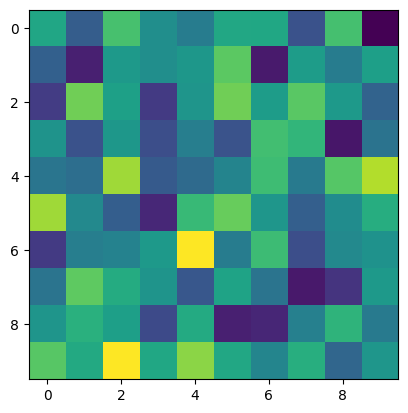

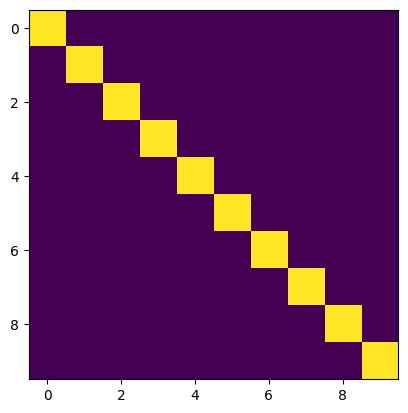

In [11]:
n = 10  # Dimension of the SO(n) group
random_element = random_son(10)
print("Random SO(3) element:")
plt.figure()
plt.imshow(random_element)

# Verify orthogonality
print("Orthogonality check (should be close to identity):")
plt.figure()
plt.imshow(np.dot(random_element.T, random_element))

# Verify determinant
print("Determinant (should be 1):")
print(np.linalg.det(random_element))